In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

In [2]:
tf.reset_default_graph()

input_data = tf.placeholder(dtype=tf.float32, shape=None)
output_data = tf.placeholder(dtype=tf.float32, shape=None)

In [3]:
#y = mx+b
#Set up training variables for line equation
slopeM = tf.Variable(0.5, dtype=tf.float32)
yInterceptB = tf.Variable(3, dtype=tf.float32)

In [4]:
#Find output value
modelOperation = slopeM * input_data + yInterceptB

error = modelOperation - output_data
squared_error = tf.square(error)
loss = tf.reduce_mean(squared_error)

In [5]:
init = tf.global_variables_initializer()

#Input and output values
x_values = [0, 1, 2, 3, 4]
y_values = [1, 3, 5, 7, 9]

In [6]:
#Weight that gets changed, learning rate is η
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.005)

train = optimizer.minimize(loss)

[0.55, 3.01]
[1.4159116, 2.6630456]
[1.5672907, 2.2335577]
[1.6790832, 1.9148629]
[1.7619936, 1.678504]
[1.8234837, 1.5032095]
[1.8690877, 1.3732032]
[1.9029093, 1.2767844]
[1.9279929, 1.2052761]
[1.9465961, 1.1522424]
[1.9603933, 1.1129099]
[1.9706261, 1.0837383]
[1.9782151, 1.0621043]
[1.9838432, 1.0460594]
[1.9880173, 1.0341603]
[1.9911131, 1.0253347]
[1.9934089, 1.0187896]
[1.9951117, 1.0139356]
[1.9963748, 1.0103345]
[1.9973115, 1.0076644]
1.0895243e-05


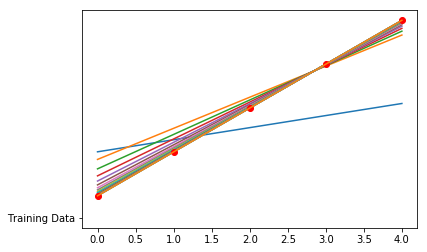

In [7]:
with tf.Session() as sess:
    sess.run(init)
    for i in range(2000):
        sess.run(train, feed_dict={input_data:x_values, output_data:y_values})
        if i % 100 == 0:
            print(sess.run([slopeM, yInterceptB]))
            plt.plot(x_values, sess.run(modelOperation, feed_dict={input_data:x_values}))
    
    print(sess.run(loss, feed_dict={input_data:x_values, output_data:y_values}))
    plt.plot(x_values, y_values, 'ro', 'Training Data')
    plt.plot(x_values, sess.run(modelOperation, feed_dict={input_data:x_values}))
    
    plt.show()
    
#50,000 steps combined error: 1.8950459e-10
#2000 steps combined error: 1.0895243e-05